## Libraries

In [33]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import matplotlib.gridspec as gridspec
from scipy import stats
%matplotlib inline

## Reading the Files

In [150]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Viewing the data and basic statistic measures

In [7]:
print("Train data dimensions: ", train_data.shape)
print("Test data dimensions: ", test_data.shape)

('Train data dimensions: ', (188318, 132))
('Test data dimensions: ', (125546, 131))


In [8]:
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


## Viewing the Data Types

In [10]:
train_data.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

## Identifying the Missing values and replacement of missing values with mean or mode if necessary

In [ ]:
train_data.apply(lambda x: sum(x.isnull()),axis=0) 

In [ ]:
train_data[''].fillna(mode(train_data['']).mode[0],inplace = True)
train_data[''].fillna(np.math.ceil(np.mean(train_data[''])),inplace = True)

## Basic Pivot table similar to Pivot table in Excel

In [59]:
pd.pivot_table(train_data,index=["cat1","cat2"],values=["loss"],
                  columns=["cat3"],aggfunc=[np.mean])

mean          
               loss          
cat3              A         B
cat1 cat2                    
A    A     7.603378  7.902532
     B     7.961100  8.544186
B    A     7.243311  7.537311
     B     7.443564  8.248489

## Splitting of Categorical and Continuous variables

In [161]:
cont_columns = []
cat_columns = []

for i in train_data.columns:
    if train_data[i].dtype == 'float':
        cont_columns.append(i)
    elif train_data[i].dtype == 'object':
        cat_columns.append(i)

## Removing Variables from a Data set

In [162]:
ID = train_data['id']
#Drop unnecessary columns
train_data.drop('id',axis=1,inplace=True)

## Removing variables from a list

In [164]:
cont_columns.pop(14)

'loss'

## Log Transformation

In [121]:
train_data['loss'] = np.log1p(train_data['loss'])

## Basic Visualizations

### Pair wise Visualizations with target variable

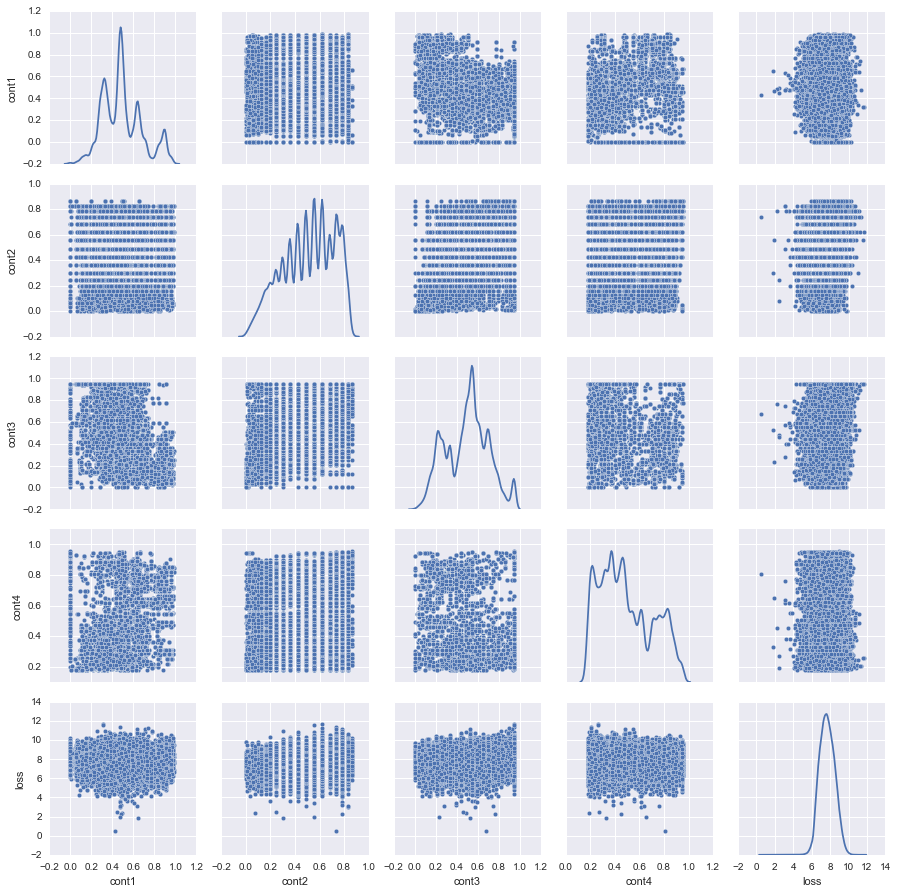

In [27]:
sns.pairplot(train_data[cont_columns], vars=['cont1','cont2','cont3','cont4','loss'], kind = 'scatter',diag_kind='kde')

### Histogram plot of Target variable (If it is a continuous variable)

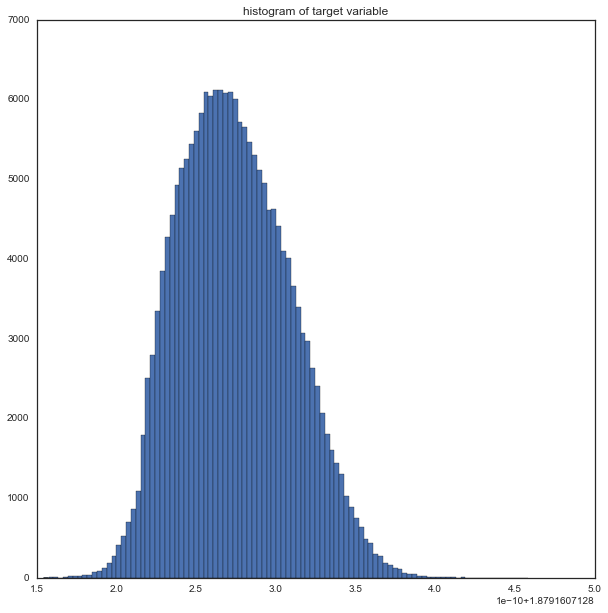

In [122]:
plt.figure(figsize=(10,10))
plt.hist(train_data.loss, bins=100)
plt.title("histogram of target variable")
plt.show()

### Correlation Matrix for continuous variables

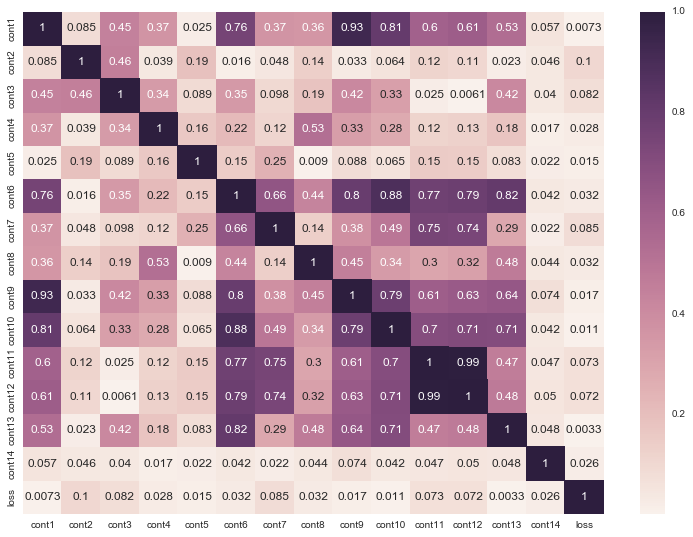

In [31]:
correlationMatrix = train_data[cont_columns].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

### Continuous Variables Distrbution

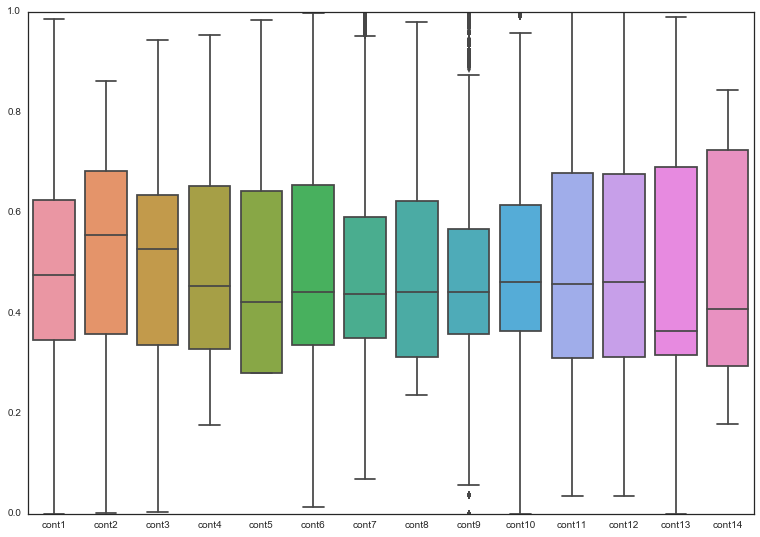

In [167]:
plt.figure(figsize=(13,9))
plt.ylim(0,1)
sns.boxplot(train_data[cont_columns])

### Skewness in Continuous variables

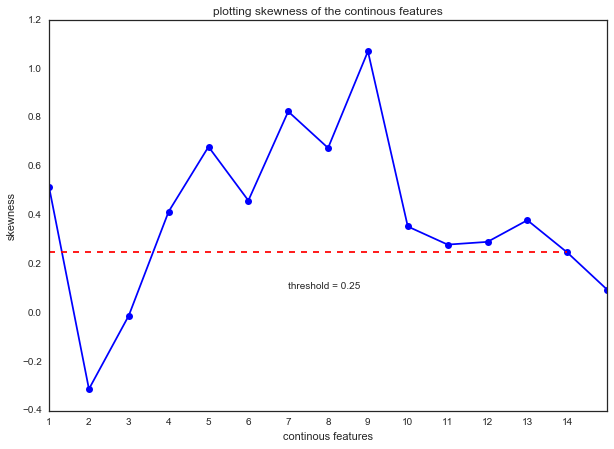

In [35]:
skewness_list = []
for cn in train_data[cont_columns].columns:
    skewness_list.append(stats.skew(train_data[cn]))

plt.figure(figsize=(10,7))
plt.plot(skewness_list, 'bo-')
plt.xlabel("continous features")
plt.ylabel("skewness")
plt.title("plotting skewness of the continous features")
plt.xticks(range(15), range(1,15,1))
plt.plot([(0.25) for i in range(0,14)], 'r--')
plt.text(6, .1, 'threshold = 0.25')
plt.show()

### Histogram plot of Skewed Columns

In [49]:
skewed_cont_columns = []
for i, cn in enumerate(cont_columns):
    if skewness_list[i] >= 0.25:
        skewed_cont_columns.append(cn)

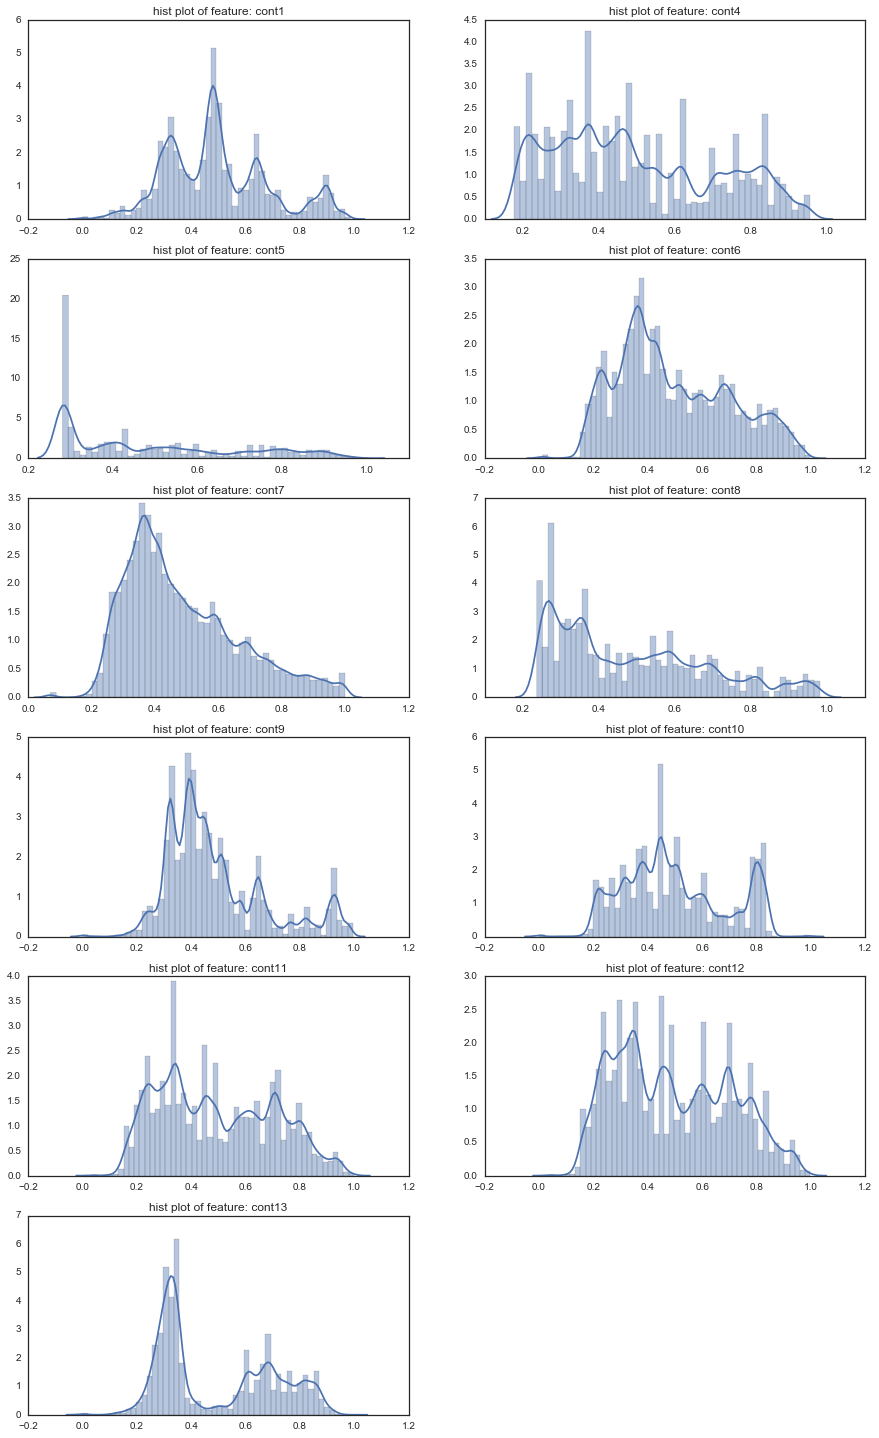

In [52]:
plt.figure(figsize=(15,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(skewed_cont_columns):
    ax = plt.subplot(gs[i])
    sns.distplot(train_data[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('hist plot of feature: ' + str(cn))
plt.show()

### Frequency Plot for categorical variables

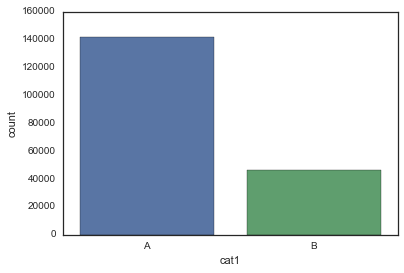

In [68]:
sns.countplot(train_data['cat1'])

### Frequency Plot of all Categorical Variables

In [ ]:
cols = dataset.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j])

## Scaling and PCA

In [70]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
for i in cat_columns:
    train_data[i] = le_sex.fit_transform(train_data[i])

In [71]:
X=train_data.values

#Scaling the values
X = scale(X)

C:\Users\Prashanth.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [72]:
pca = PCA(n_components=131)
pca.fit(X)

PCA(copy=True, n_components=131, whiten=False)

In [73]:
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

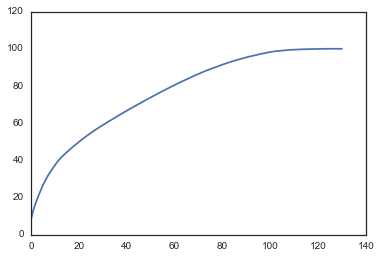

In [74]:
plt.plot(var1)

## Label Encoding and One Hot Encoding

In [75]:
## Removing ID Column
train_data = train_data.iloc[:,1:]
cols = train_data.columns

In [ ]:
import pandas
import numpy
#cat1 to cat116 have strings. The ML require numberical data
#One-hot encoding converts an attribute to a binary vector

#Variable to hold the list of variables for an attribute in the train and test data
split = 116
labels = []

for i in range(0,split):
    train = train_data[cols[i]].unique()
    test = test_data[cols[i]].unique()
    labels.append(list(set(train) | set(test)))    

del test_data

#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(train_data.iloc[:,i])
    feature = feature.reshape(train_data.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
dataset_encoded = numpy.concatenate((encoded_cats,train_data.iloc[:,split:].values),axis=1)
del cats
del feature
#del dataset
del encoded_cats
print(dataset_encoded.shape)

In [77]:
r, c = dataset_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = dataset_encoded[:,0:(c-1)]
Y = dataset_encoded[:,(c-1)]
del dataset_encoded



Hello


In [ ]:
#Read test dataset
dataset_test = pd.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

del cats

#Concatenate encoded attributes with continuous attributes
X_test = numpy.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

## Train-Validation Split

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Modelling

### Linear Regression

In [79]:
#Validation chunk size
val_size = 0.2

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

loss = train_data['loss']
train_data.drop('loss',axis=1,inplace=True)
X = train_data
Y = loss

#Split the data into chunks
from sklearn import cross_validation
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)
del X
del Y



In [82]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
from sklearn.metrics import mean_absolute_error
# The mean Absolute error
print("Mean Absolute error: %.2f"
      % np.mean(abs(regr.predict(X_val) - Y_val)))

Mean Absolute error: 0.46


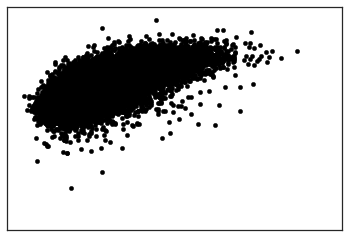

In [105]:
# Plot outputs
plt.scatter(regr.predict(X_val), Y_val,color='black')

plt.xticks(())
plt.yticks(())

plt.show()

## Random Forest

In [ ]:
## For Classification
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train,Y_train)

In [124]:
## For Regression
from sklearn import tree
model = tree.DecisionTreeRegressor() 
model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [126]:
#Predict Output
predicted= model.predict(X_val)

## Logistic Regression

In [ ]:
import statsmodels.api as sm

res = sm.formula.glm("using + notUsing ~ C(age, Treatment('<25')) + "
                     "education + wantsMore",  family=sm.families.Binomial(), 
                     data=cuse).fit() 
res.summary()

## XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train,y_train)
dvalid = xgb.DMatrix(X_val, y_val)

dtrain = xgb.DMatrix(train_x,train_y)
params = {
    "objective": "reg:linear",
    "booster": "gbtree",
    "max_depth":6,
    "eval_metric": "mae",
    "eta": 0.05,
    "silent": 1,
    'colsample':0.9,
    'subsample':0.9
}

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

gbm = xgb.train(params, dtrain,500, evals=watchlist,
                early_stopping_rounds=10, verbose_eval=True)